Bird: Mourning Dove

https://www.pwrc.usgs.gov/bbs/RawData/

https://science.ebird.org/en/status-and-trends/species/moudov/abundance-map-weekly?week=1

# Part A: Exploratory Analysis and Data cleanup

In [25]:
import pandas as pd

df = pd.read_csv("mourningdove.csv")

In [26]:
# Grouping by State, ignoring individual routes and aggregating them to state level

df_grouped = df.groupby(['State', 'Year'], as_index=False)['SpeciesTotal'].sum()
df_grouped

,State,Year,SpeciesTotal
0,2.0,1990.0,1891.0
1,2.0,1991.0,1802.0
2,2.0,1992.0,1776.0
3,2.0,1993.0,2127.0
4,2.0,1994.0,2098.0
...,...,...,...
1720,92.0,2016.0,906.0
1721,92.0,2017.0,795.0
1722,92.0,2018.0,771.0
1723,92.0,2019.0,519.0


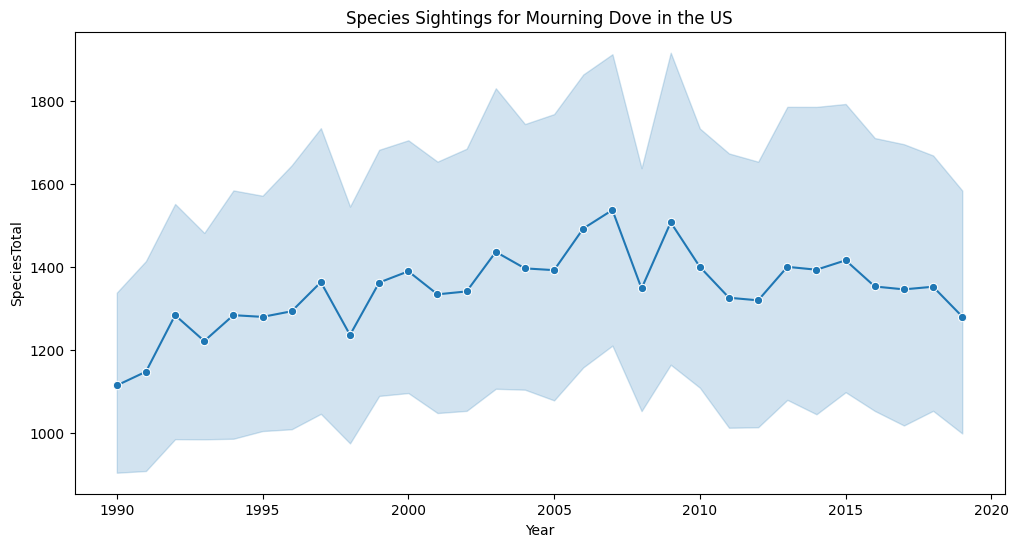

In [27]:
# Visualizing our data 

import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,6))
sns.lineplot(data=df_grouped, x="Year", y="SpeciesTotal", marker="o")

plt.title("Species Sightings for Mourning Dove in the US", fontsize=12)
plt.xlabel("Year", fontsize=10)
plt.ylabel("SpeciesTotal", fontsize=10)

plt.show()

The metadata defines each state: 

'''
02,Alabama; 03,Alaska; 04,Alberta; 06,Arizona; 07,Arkansas; 11,British Columbia; 14,California; 17,Colorado; 18,Connecticut; 21,Delaware; 25,Florida; 27,Georgia; 33,Idaho; 34,Illinois; 35,Indiana; 36,Iowa; 38,Kansas; 39,Kentucky; 42,Louisiana; 43,Northwest Territories; 44,Maine; 45,Manitoba; 46,Maryland; 47,Massachusetts; 49,Michigan; 50,Minnesota; 51,Mississippi; 52,Missouri; 53,Montana; 54,Nebraska; 55,Nevada; 56,New Brunswick; 57,Newfoundland and Labrador; 58,New Hampshire; 59,New Jersey; 60,New Mexico; 61,New York; 62,Nunavut; 63,North Carolina; 64,North Dakota; 65,Nova Scotia; 66,Ohio; 67,Oklahoma; 68,Ontario; 69,Oregon; 72,Pennsylvania; 75,Prince Edward Island; 76,Quebec; 77,Rhode Island; 79,Saskatchewan; 80,South Carolina; 81,South Dakota; 82,Tennessee; 83,Texas; 85,Utah; 87,Vermont; 88,Virginia; 89,Washington; 90,West Virginia; 91,Wisconsin; 92,Wyoming; 93,Yukon
'''

We will use, for now, 07 Arkansas, 34 Illinois, 52 Missouri.

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# mapping
state_code_to_name = {
    2: "Alabama", 3: "Alaska", 4: "Alberta", 6: "Arizona", 7: "Arkansas", 11: "British Columbia",
    14: "California", 17: "Colorado", 18: "Connecticut", 21: "Delaware", 25: "Florida", 27: "Georgia",
    33: "Idaho", 34: "Illinois", 35: "Indiana", 36: "Iowa", 38: "Kansas", 39: "Kentucky", 42: "Louisiana",
    43: "Northwest Territories", 44: "Maine", 45: "Manitoba", 46: "Maryland", 47: "Massachusetts",
    49: "Michigan", 50: "Minnesota", 51: "Mississippi", 52: "Missouri", 53: "Montana", 54: "Nebraska",
    55: "Nevada", 56: "New Brunswick", 57: "Newfoundland and Labrador", 58: "New Hampshire",
    59: "New Jersey", 60: "New Mexico", 61: "New York", 62: "Nunavut", 63: "North Carolina",
    64: "North Dakota", 65: "Nova Scotia", 66: "Ohio", 67: "Oklahoma", 68: "Ontario", 69: "Oregon",
    72: "Pennsylvania", 75: "Prince Edward Island", 76: "Quebec", 77: "Rhode Island",
    79: "Saskatchewan", 80: "South Carolina", 81: "South Dakota", 82: "Tennessee", 83: "Texas",
    85: "Utah", 87: "Vermont", 88: "Virginia", 89: "Washington", 90: "West Virginia",
    91: "Wisconsin", 92: "Wyoming", 93: "Yukon"
}

# Filter only for rows where the state code exists in the mapping
df_grouped = df_grouped[df_grouped["State"].isin(state_code_to_name.keys())]

# Map numeric codes to state/province names
df_grouped['State'] = df_grouped['State'].map(state_code_to_name)

df_grouped


,State,Year,SpeciesTotal
0,Alabama,1990.0,1891.0
1,Alabama,1991.0,1802.0
2,Alabama,1992.0,1776.0
3,Alabama,1993.0,2127.0
4,Alabama,1994.0,2098.0
...,...,...,...
1720,Wyoming,2016.0,906.0
1721,Wyoming,2017.0,795.0
1722,Wyoming,2018.0,771.0
1723,Wyoming,2019.0,519.0


In [136]:
state_totals = df_grouped.groupby("State")["SpeciesTotal"].sum().reset_index()
state_totals = state_totals.sort_values(by="SpeciesTotal", ascending=False)
high_count_states = state_totals[state_totals["SpeciesTotal"] > 20000]["State"]
df_high = df_grouped[df_grouped["State"].isin(high_count_states[3:])]
state_totals

,State,SpeciesTotal
50,Texas,207804.0
15,Kansas,109025.0
12,Illinois,100475.0
6,Colorado,99360.0
9,Florida,88857.0
35,North Carolina,81071.0
5,California,75061.0
42,Pennsylvania,74418.0
27,Nebraska,73918.0
38,Ohio,66190.0


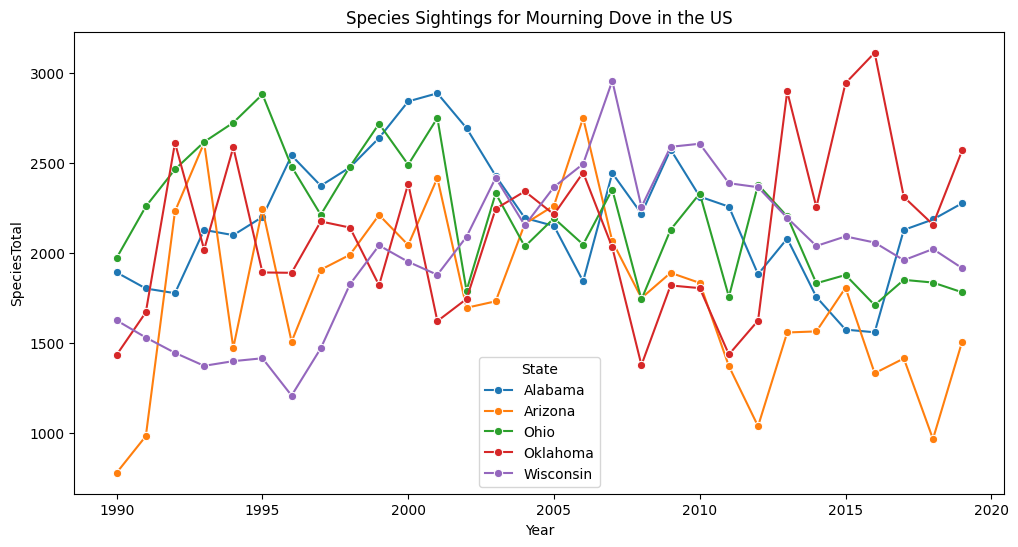

In [244]:
# Visualizing our data 

import seaborn as sns
import matplotlib.pyplot as plt 
#states = [ 'Ohio','Alabama', 'Oklahoma', 'Arizona',]
#states = [ 'Ohio','Alabama', 'Oklahoma', 'Wisconsin',]
#states = df_high['State'].unique()
#states = [ 'Oklahoma', 'Wisconsin',] #Ohio
states = [ 'Ohio','Alabama', 'Oklahoma', 'Wisconsin','Arizona']

df_filtered = df_grouped[df_grouped["State"].isin(states)]

plt.figure(figsize=(12,6))
sns.lineplot(data=df_filtered, x="Year", y="SpeciesTotal", hue="State", marker="o")

plt.title("Species Sightings for Mourning Dove in the US", fontsize=12)
plt.xlabel("Year", fontsize=10)
plt.ylabel("SpeciesTotal", fontsize=10)
plt.show()

Now comparing with emission types

In [245]:
import pandas as pd

df_emissions = pd.read_csv("full_data.csv")
df_emissions.rename(columns={'Region': 'State', 'Value': 'Emissions'}, inplace=True)

df_emissions = df_emissions[df_emissions["State"].isin([state.replace(' ', '_') for state in states])]

df_emissions_pivoted = df_emissions.pivot_table(index=["State", "Year"], columns="Emission Type", values="Emissions").reset_index()
df_emissions_pivoted.columns.name = None  # removes 'Emission Type' as the columns' name
df_emissions_pivoted


,State,Year,Carbon dioxide,Fluorinated gases,Gross total,Land use and forestry carbon stock change,Methane,Net total,Nitrous oxide
0,Alabama,1990,109.459874,4.975341,149.387626,-55.825972,31.651450,94.689057,4.428363
1,Alabama,1991,113.052795,5.319994,152.421264,-55.420261,30.465628,98.139711,4.721555
2,Alabama,1992,119.414117,5.704824,157.596718,-55.622386,28.942480,103.150159,4.711124
3,Alabama,1993,124.578531,6.013118,160.560890,-55.972732,26.448053,105.868105,4.801134
4,Alabama,1994,123.212076,6.513821,162.157620,-55.739611,28.718976,107.865923,5.160662
...,...,...,...,...,...,...,...,...,...
160,Wisconsin,2018,102.291864,2.824717,130.722936,-23.393974,17.218611,110.624722,11.683504
161,Wisconsin,2019,95.603438,2.863185,122.784683,-23.371439,16.903371,102.728172,10.729618
162,Wisconsin,2020,87.889697,2.758967,114.639833,-22.399979,16.895004,95.443378,10.299689
163,Wisconsin,2021,93.554029,2.820550,120.589520,-22.693423,17.080057,101.164020,10.402808


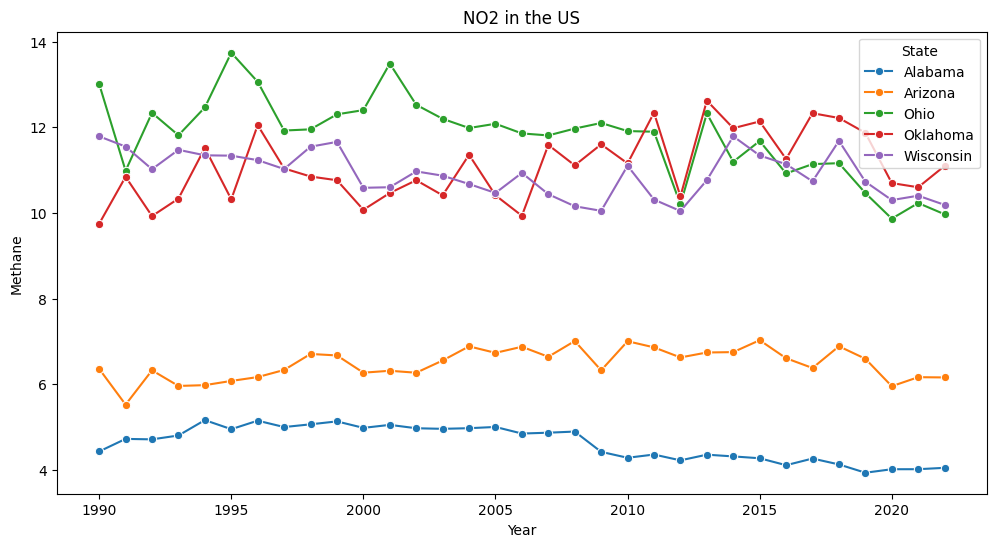

In [246]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_emissions_pivoted, x="Year", y="Nitrous oxide", hue="State", marker="o")

plt.title("NO2 in the US", fontsize=12)
plt.xlabel("Year", fontsize=10)
plt.ylabel("Methane", fontsize=10)
plt.show()

In [247]:
df_filtered['State'] = df_filtered['State'].str.replace(' ', '_')
df_combined = pd.merge(df_filtered, df_emissions_pivoted, on=['State', 'Year'], how='left')
df_combined = df_combined.drop(columns=['Gross total', 'Net total'])
df_combined.columns = df_combined.columns.str.replace(' ', '_')

df_combined

/var/folders/99/frq78g2d2qsdnc0tn6nrkg900000gn/T/ipykernel_22582/2790325726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['State'] = df_filtered['State'].str.replace(' ', '_')


,State,Year,SpeciesTotal,Carbon_dioxide,Fluorinated_gases,Land_use_and_forestry_carbon_stock_change,Methane,Nitrous_oxide
0,Alabama,1990.0,1891.0,109.459874,4.975341,-55.825972,31.651450,4.428363
1,Alabama,1991.0,1802.0,113.052795,5.319994,-55.420261,30.465628,4.721555
2,Alabama,1992.0,1776.0,119.414117,5.704824,-55.622386,28.942480,4.711124
3,Alabama,1993.0,2127.0,124.578531,6.013118,-55.972732,26.448053,4.801134
4,Alabama,1994.0,2098.0,123.212076,6.513821,-55.739611,28.718976,5.160662
...,...,...,...,...,...,...,...,...
145,Wisconsin,2015.0,2091.0,100.757915,3.196272,-23.049184,16.567310,11.341810
146,Wisconsin,2016.0,2057.0,96.618345,3.019417,-23.306842,17.041917,11.138244
147,Wisconsin,2017.0,1959.0,99.481316,3.213225,-23.188085,17.170417,10.738654
148,Wisconsin,2018.0,2021.0,102.291864,2.824717,-23.393974,17.218611,11.683504


Let's look at one state. Let's choose Arkansas for now:

In [ ]:
import matplotlib.pyplot as plt

# Arkansas
state_data = df_combined[df_combined['State'] == 'Arkansas']

fig, axes = plt.subplots(5, 1, figsize=(20, 20), sharex=True)

emission_types = ['Carbon_dioxide', 'Fluorinated_gases', 'Land_use_and_forestry_carbon_stock_change', 
                  'Methane', 'Nitrous_oxide']

colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:purple', 'tab:brown']

for i, emission in enumerate(emission_types):
    ax = axes[i]  
    
    # species
    ax.set_ylabel('Species Total', color='tab:blue')
    ax.plot(state_data['Year'], state_data['SpeciesTotal'], color='tab:blue', label='Species Total')
    
    # emission type
    ax2 = ax.twinx()  
    ax2.set_ylabel(emission, color=colors[i])
    ax2.plot(state_data['Year'], state_data[emission], color=colors[i], label=emission, linestyle='--')
    
    # key
    ax.set_title(f'{emission} vs Species Total')
    ax.tick_params(axis='y', labelcolor='tab:blue') 
    ax2.tick_params(axis='y', labelcolor=colors[i])  
    ax2.legend(loc='upper left')

fig.tight_layout() 
plt.xlabel('Year')
plt.show()


# Part C: Analysis

Let's take a closer look at the distribution of the data.

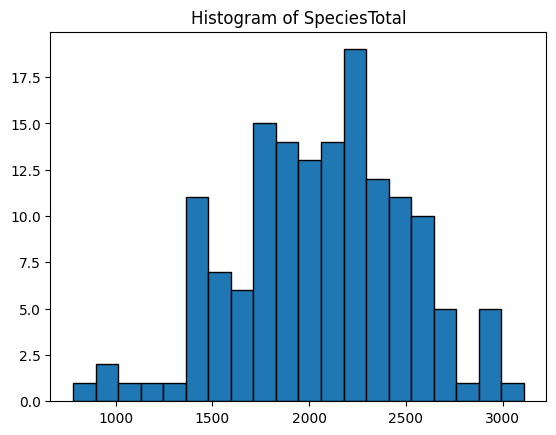

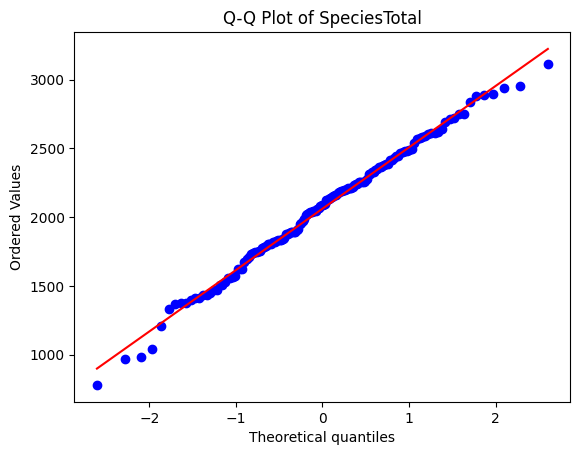

In [248]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Histogram
plt.hist(df_combined["SpeciesTotal"], bins=20, edgecolor="k")
plt.title("Histogram of SpeciesTotal")
plt.show()

# Q-Q Plot
stats.probplot(df_combined["SpeciesTotal"], dist="norm", plot=plt)
plt.title("Q-Q Plot of SpeciesTotal")
plt.show()


                            OLS Regression Results                            
Dep. Variable:           SpeciesTotal   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     5.176
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           4.63e-06
Time:                        11:59:54   Log-Likelihood:                -1104.7
No. Observations:                 150   AIC:                             2229.
Df Residuals:                     140   BIC:                             2260.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

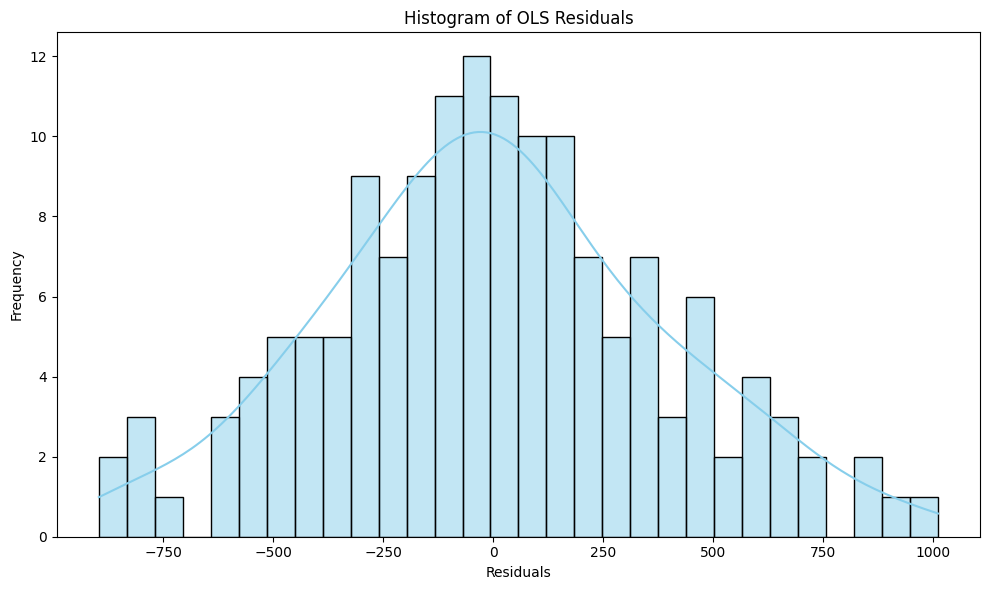

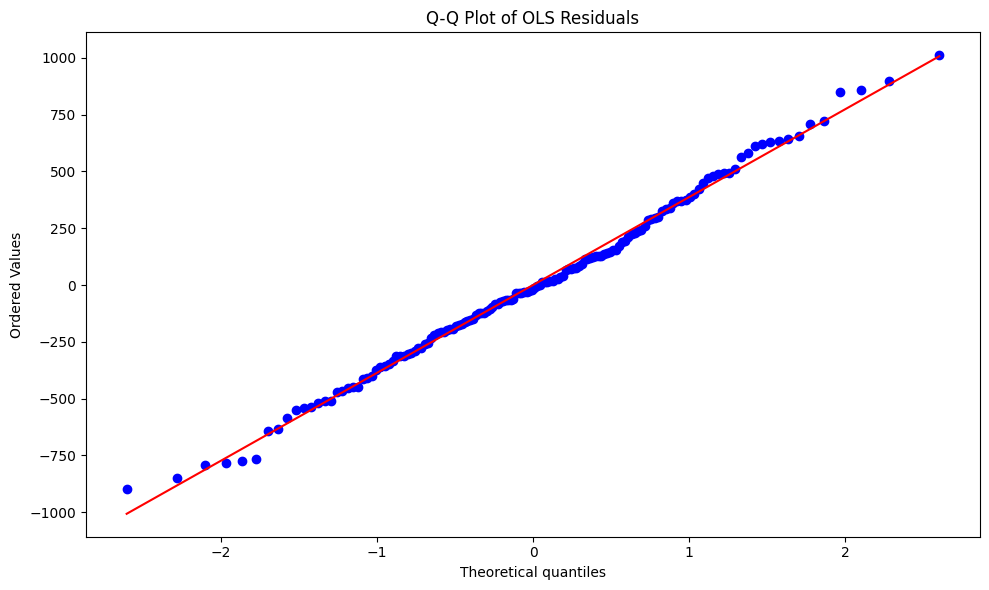

Shapiro-Wilk Test statistic: 0.9938, p-value: 0.7697


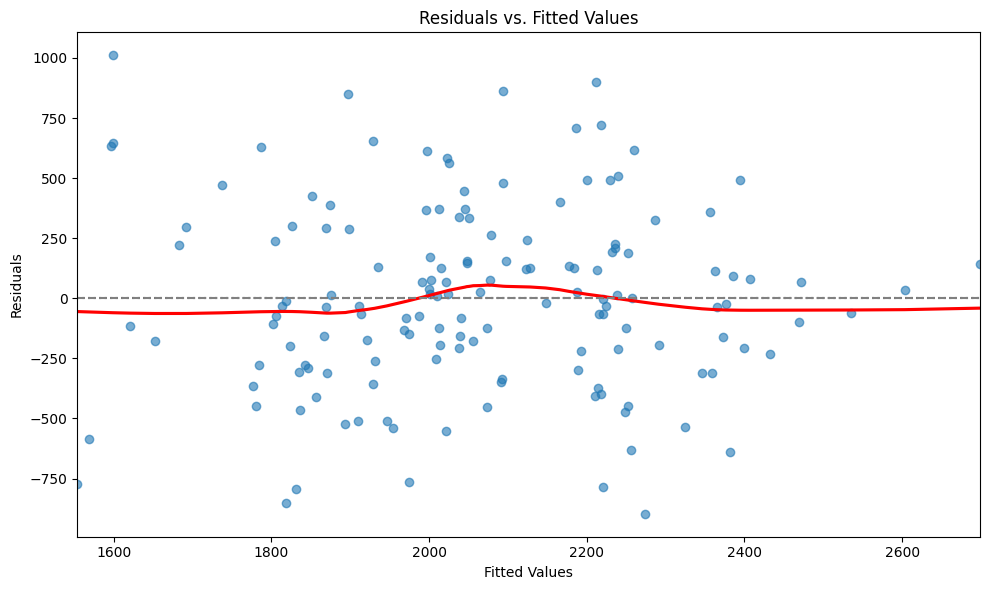

In [249]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro


# Fit the model using OLS
formula = "SpeciesTotal ~ Carbon_dioxide + Fluorinated_gases + Land_use_and_forestry_carbon_stock_change + Methane + Nitrous_oxide + C(State)"
model = smf.ols(formula, data=df_combined)
results = model.fit()

# Show the summary of the regression results
print(results.summary())

# Extract residuals and fitted values
residuals = results.resid
fitted = results.fittedvalues

# 1. Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='skyblue')
plt.title('Histogram of OLS Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 2. Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of OLS Residuals')
plt.tight_layout()
plt.show()

# 3. Shapiro-Wilk Test for normality
stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test statistic: {stat:.4f}, p-value: {p_value:.4g}")

# 4. Residuals vs. Fitted plot
plt.figure(figsize=(10, 6))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.6})
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.tight_layout()
plt.show()


In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Poisson GLM
formula = "SpeciesTotal ~ Carbon_dioxide + Fluorinated_gases + Land_use_and_forestry_carbon_stock_change + Methane + Nitrous_oxide + C(State)"
model = smf.glm(formula, data=df_combined, family=sm.families.Poisson()).fit()
print(model.summary())
deviance = model.deviance
df_resid = model.df_resid

# Calculate the dispersion ratio
dispersion_ratio = deviance / df_resid
print(f"Residual Deviance: {deviance}")
print(f"Degrees of Freedom: {df_resid}")
print(f"Dispersion Ratio: {dispersion_ratio}")


                 Generalized Linear Model Regression Results                  
Dep. Variable:           SpeciesTotal   No. Observations:                   30
Model:                            GLM   Df Residuals:                       24
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.4
Date:                Wed, 30 Apr 2025   Deviance:                       4982.9
Time:                        10:27:38   Pearson chi2:                 4.81e+03
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit the Negative Binomial GLM model
formula = "SpeciesTotal ~ Carbon_dioxide + Fluorinated_gases + Land_use_and_forestry_carbon_stock_change + Methane + Nitrous_oxide + C(State)"
model = smf.glm(formula, data=df_combined, family=sm.families.NegativeBinomial()).fit()

# Print the results summary
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:           SpeciesTotal   No. Observations:                   30
Model:                            GLM   Df Residuals:                       24
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -295.06
Date:                Wed, 30 Apr 2025   Deviance:                      0.81780
Time:                        10:27:41   Pearson chi2:                    0.754
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01544
Covariance Type:            nonrobust                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


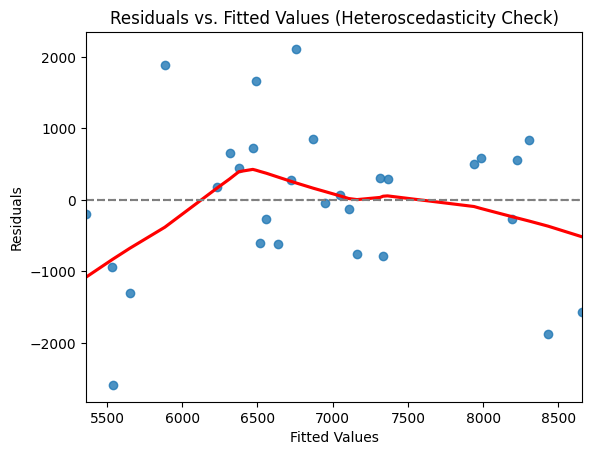

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot residuals vs fitted values (for heteroscedasticity check)
sns.residplot(x=model.fittedvalues, y=model.resid_response, lowess=True, line_kws={'color': 'red'})

plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values (Heteroscedasticity Check)')
plt.axhline(0, linestyle='--', color='grey')
plt.show()


In [22]:
print("Deviance / df_resid:", model.deviance / model.df_resid)
print("Pearson Chi² / df_resid:", model.pearson_chi2 / model.df_resid)

Deviance / df_resid: 0.034074867457360845
Pearson Chi² / df_resid: 0.03142124561645221


In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

# Fit the Negative Binomial GLM model (with robust standard errors)
formula = "SpeciesTotal ~ Carbon_dioxide + Fluorinated_gases + Land_use_and_forestry_carbon_stock_change + Methane + Nitrous_oxide + C(State)"
model = smf.glm(formula, data=df_combined, family=sm.families.NegativeBinomial()).fit(cov_type='HC3')

# Print the summary with robust standard errors
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:           SpeciesTotal   No. Observations:                   30
Model:                            GLM   Df Residuals:                       24
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -295.06
Date:                Wed, 30 Apr 2025   Deviance:                      0.81780
Time:                        10:28:14   Pearson chi2:                    0.754
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01544
Covariance Type:                  HC3                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


OLS:

In [138]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "SpeciesTotal ~ Carbon_dioxide + Fluorinated_gases + Land_use_and_forestry_carbon_stock_change + Methane + Nitrous_oxide + C(State)"

# Fit the model using OLS
model = smf.ols(formula, data=df_combined)
results = model.fit()

# Show the summary of the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:           SpeciesTotal   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     95.14
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           1.17e-36
Time:                        21:16:26   Log-Likelihood:                -665.31
No. Observations:                  90   AIC:                             1347.
Df Residuals:                      82   BIC:                             1367.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

OLS with standardized SpeciesTotal:

In [139]:
formula = "SpeciesTotal ~ Carbon_dioxide + Fluorinated_gases + Land_use_and_forestry_carbon_stock_change + Methane + Nitrous_oxide + C(State)"

# GLM with Gaussian family (normal distribution) and identity link
model_glm = smf.glm(formula, data=df_combined, family=sm.families.Gaussian(sm.families.links.identity())).fit()

# Show the summary of the GLM results
print(model_glm.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:           SpeciesTotal   No. Observations:                   90
Model:                            GLM   Df Residuals:                       82
Model Family:                Gaussian   Df Model:                            7
Link Function:               identity   Scale:                      1.6936e+05
Method:                          IRLS   Log-Likelihood:                -665.31
Date:                Tue, 29 Apr 2025   Deviance:                   1.3887e+07
Time:                        21:16:26   Pearson chi2:                 1.39e+07
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9994
Covariance Type:            nonrobust                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [140]:
model = smf.ols("SpeciesTotal ~ Carbon_dioxide + Fluorinated_gases + Land_use_and_forestry_carbon_stock_change + Methane + Nitrous_oxide + C(State) + Year", data=df_combined)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           SpeciesTotal   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     92.54
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           1.70e-37
Time:                        21:16:26   Log-Likelihood:                -660.54
No. Observations:                  90   AIC:                             1339.
Df Residuals:                      81   BIC:                             1362.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = results.resid_response
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

sns.scatterplot(x=results.fittedvalues, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()


AttributeError: 'OLSResults' object has no attribute 'resid_response'

In [ ]:
correlation_matrix = df_combined[['SpeciesTotal', 'Carbon dioxide', 'Fluorinated gases', 
                                  'Land use and forestry carbon stock change', 'Methane', 'Nitrous oxide']].corr()
correlation_matrix


,SpeciesTotal,Carbon dioxide,Fluorinated gases,Land use and forestry carbon stock change,Methane,Nitrous oxide
SpeciesTotal,1.000000,0.915412,0.815209,0.814000,0.372454,0.873839
Carbon dioxide,0.915412,1.000000,0.858797,0.917618,0.430775,0.971450
Fluorinated gases,0.815209,0.858797,1.000000,0.711549,0.603259,0.794049
Land use and forestry carbon stock change,0.814000,0.917618,0.711549,1.000000,0.378159,0.936623
Methane,0.372454,0.430775,0.603259,0.378159,1.000000,0.382065
Nitrous oxide,0.873839,0.971450,0.794049,0.936623,0.382065,1.000000


In [ ]:
import statsmodels.api as sm

X = df_combined[['Carbon dioxide', 'Fluorinated gases', 'Land use and forestry carbon stock change','Methane', 'Nitrous oxide']]
X = sm.add_constant(X)
y = df_combined['SpeciesTotal']

# regression model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           SpeciesTotal   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     93.52
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           7.87e-33
Time:                        13:21:22   Log-Likelihood:                -680.09
No. Observations:                  90   AIC:                             1372.
Df Residuals:                      84   BIC:                             1387.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

df_train = df_combined[df_combined['State'].isin([7, 34, 52])]

features = ['Carbon dioxide', 'Fluorinated gases', 'Land use and forestry carbon stock change', 'Methane', 'Nitrous oxide']
X_train = df_train[features]
y_train = df_train['SpeciesTotal']

model = LinearRegression()

cv = KFold(n_splits=5, shuffle=True, random_state=1)

r2_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')

print("Cross-validated R² scores:", np.round(r2_scores, 4))
print("Average R²:", np.round(np.mean(r2_scores), 4))


Cross-validated R² scores: [0.7801 0.798  0.8297 0.8017 0.6416]
Average R²: 0.7702


# Trying out Averages

Instead of testing raw bird populations (sightings), let's try to look at the proportion of birds spotted during the month (e.g instead of looking at January data, look at p1 = total January / total year). This gives us proportions that control for population sizes and are standardized across stations.

In [ ]:
# Copy over all data
df2 = df.copy()
df2

,Country,State,Route,Year,Aou,SpeciesTotal
0,124.0,4.0,1.0,1990.0,3160.0,7.0
1,124.0,4.0,1.0,1991.0,3160.0,32.0
2,124.0,4.0,1.0,1992.0,3160.0,1.0
3,124.0,4.0,1.0,1993.0,3160.0,2.0
4,124.0,4.0,1.0,1994.0,3160.0,5.0
...,...,...,...,...,...,...
76660,840.0,92.0,901.0,2018.0,3160.0,1.0
76661,840.0,92.0,902.0,2004.0,3160.0,25.0
76662,840.0,92.0,902.0,2006.0,3160.0,13.0
76663,840.0,92.0,902.0,2015.0,3160.0,2.0


In [ ]:
# State level

df2_grouped = df2.groupby(['State', 'Year'], as_index=False)['SpeciesTotal'].sum()
df2_grouped

states = {
    'Arkansas': 7,
    'Illinois': 34,
    'Missouri': 52
}

df_emissions = pd.read_csv("full_data.csv")

df_emissions.rename(columns={'Region': 'State', 'Value': 'Emissions'}, inplace=True)
df_emissions['State'] = df_emissions['State'].map(states)
df_emissions = df_emissions[df_emissions["State"].isin([7, 34, 52])]

df2_filtered = df2_grouped[df2_grouped["State"].isin([7,34,52])]

df_emissions_pivoted = df_emissions.pivot_table(index=['State', 'Year'], columns='Emission Type', values='Emissions', aggfunc='sum')
df_emissions_pivoted.columns = [col for col in df_emissions_pivoted.columns]
df_emissions_pivoted.reset_index(inplace=True)
df2_combined = pd.merge(df2_filtered, df_emissions_pivoted, on=['State', 'Year'], how='left')
df2_combined = df2_combined.drop(columns=['Gross total', 'Net total'])

# Now average it 
# Calculate the total SpeciesTotal for each state
state_totals = df2_combined.groupby('State')['SpeciesTotal'].transform('sum')

# Divide each SpeciesTotal by the total for its state
df2_combined['SpeciesFraction'] = df2_combined['SpeciesTotal'] / state_totals

(df2_combined[df2_combined['State'] == 52.0])


,State,Year,SpeciesTotal,Carbon dioxide,Fluorinated gases,Land use and forestry carbon stock change,Methane,Nitrous oxide,SpeciesFraction
60,52.0,1990.0,1021.0,107.509059,3.710880,-26.745221,16.346032,14.788770,0.022124
61,52.0,1991.0,933.0,107.920089,2.087357,-27.213838,16.466338,13.302337,0.020217
62,52.0,1992.0,1522.0,107.582878,2.023446,-27.193389,16.403655,12.632885,0.032979
63,52.0,1993.0,1031.0,105.493527,2.157657,-26.740170,16.491694,14.219442,0.022340
64,52.0,1994.0,1346.0,113.728963,2.241290,-27.575711,17.053698,13.723466,0.029166
65,52.0,1995.0,1162.0,120.066262,2.610223,-26.046697,16.619020,13.824048,0.025179
66,52.0,1996.0,1307.0,125.470039,2.786934,-27.788979,16.681376,15.093699,0.028321
67,52.0,1997.0,1250.0,129.182866,2.986082,-27.847806,16.434598,14.452427,0.027086
68,52.0,1998.0,1318.0,131.184019,2.903199,-26.389206,16.146931,14.306932,0.028559
69,52.0,1999.0,1104.0,130.941900,3.015938,-26.896383,15.907059,13.296123,0.023922


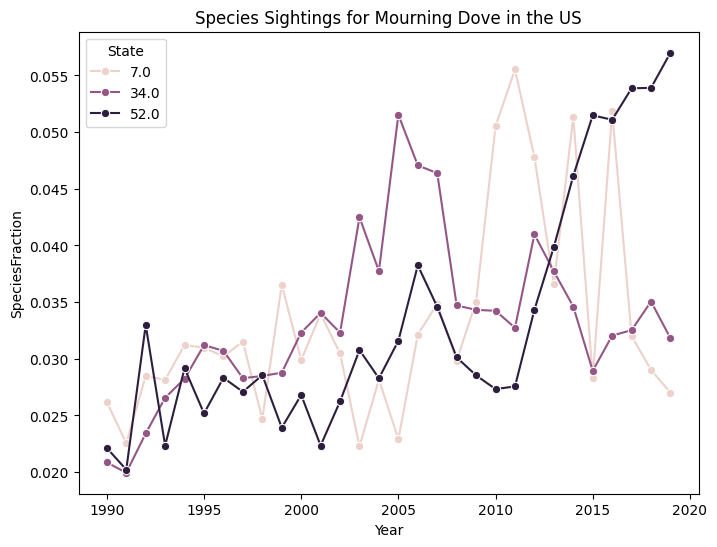

In [ ]:
# Visualizing our data 

import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(8,6))
sns.lineplot(data=df2_combined, x="Year", y="SpeciesFraction", hue="State", marker="o")

plt.title("Species Sightings for Mourning Dove in the US", fontsize=12)
plt.xlabel("Year", fontsize=10)
plt.ylabel("SpeciesFraction", fontsize=10)
plt.show()

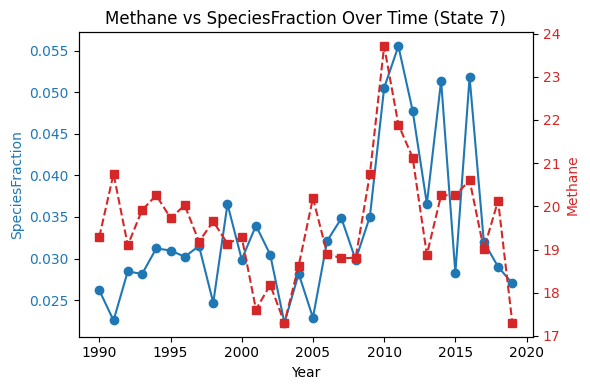

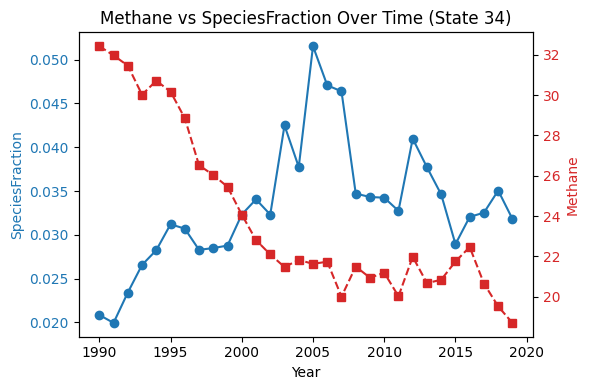

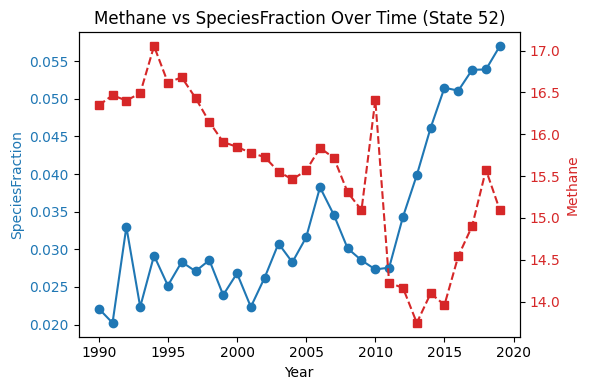

In [ ]:
import matplotlib.pyplot as plt

for state in states.values():
    df_state = df2_combined[df2_combined["State"] == state]

    fig, ax1 = plt.subplots(figsize=(6,4))

    # First axis for SpeciesFraction
    ax1.set_title(f"Methane vs SpeciesFraction Over Time (State {state})")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("SpeciesFraction", color="tab:blue")
    ax1.plot(df_state["Year"], df_state["SpeciesFraction"], color="tab:blue", marker="o", label="SpeciesFraction")
    ax1.tick_params(axis='y', labelcolor="tab:blue")

    # Second axis for Methane
    ax2 = ax1.twinx()
    ax2.set_ylabel("Methane", color="tab:red")
    ax2.plot(df_state["Year"], df_state["Methane"], color="tab:red", marker="s", linestyle="--", label="Methane")
    ax2.tick_params(axis='y', labelcolor="tab:red")

    fig.tight_layout()
    plt.show()


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit the ANCOVA model: SpeciesFraction ~ Methane + State (block)
model = smf.ols('SpeciesFraction ~ Methane + C(State)', data=df2_combined).fit()

# Run ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


            sum_sq    df         F    PR(>F)
C(State)  0.000342   2.0  2.211897  0.115685
Methane   0.000534   1.0  6.898622  0.010211
Residual  0.006657  86.0       NaN       NaN


In [ ]:
import statsmodels.formula.api as smf

# Fit linear model with State as a categorical variable
model = smf.ols("SpeciesFraction ~ Methane + C(State)", data=df2_combined).fit()

# View the regression coefficients
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        SpeciesFraction   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     2.300
Date:                Sun, 20 Apr 2025   Prob (F-statistic):             0.0830
Time:                        13:21:23   Log-Likelihood:                 300.33
No. Observations:                  90   AIC:                            -592.7
Df Residuals:                      86   BIC:                            -582.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0519      0.007  

In [ ]:
import statsmodels.api as sm

# Define your predictors (emissions only)
X = df2_combined[['Carbon dioxide', 'Fluorinated gases', 
                  'Land use and forestry carbon stock change', 
                  'Methane', 'Nitrous oxide']]

# Add dummy variables for State (one-hot encode, drop first to avoid multicollinearity)
X = pd.concat([X, pd.get_dummies(df2_combined['State'], prefix='State', drop_first=True)], axis=1)

# Add constant for intercept
X = sm.add_constant(X)

# Define target
y = df2_combined['SpeciesFraction']

# Fit the model
model = sm.OLS(y, X).fit()

# Check results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        SpeciesFraction   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     4.437
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           0.000318
Time:                        13:21:29   Log-Likelihood:                 311.31
No. Observations:                  90   AIC:                            -606.6
Df Residuals:                      82   BIC:                            -586.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### State level

### Station level